In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bank.csv')

In [3]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['deposit'] = le.fit_transform(df['deposit'])

In [5]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2,3,8,10,15])],remainder = 'passthrough')
x = ct.fit_transform(x)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=0)


# SVM 

[[1003  202]
 [ 134  894]]
Accuracy is 0.85


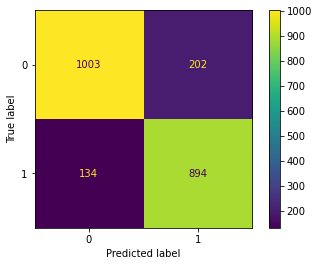

In [9]:
from sklearn.svm import SVC
sc = SVC(kernel='rbf')
clf = sc.fit(x_tr,y_tr)
y_pred = clf.predict(x_te)

from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix
print(confusion_matrix(y_te,y_pred))
print('Accuracy is {:.2f}'.format(accuracy_score(y_te,y_pred)))
plot_confusion_matrix(clf,x_te,y_te)

# Naive Bayes

[[1049  156]
 [ 472  556]]
Accuracy is 0.72


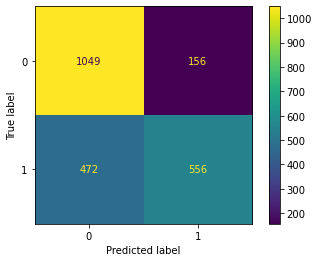

In [11]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_tr, y_tr)

y_pred = nb.predict(x_te)
print(confusion_matrix(y_te,y_pred))
plot_confusion_matrix(nb,x_te,y_te)
print('Accuracy is {:.2f}'.format(accuracy_score(y_te,y_pred)))

# AdaBoost 

In [12]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
kfold = model_selection.KFold(n_splits=10, random_state=7)
model = AdaBoostClassifier(n_estimators=30, random_state=7)

model.fit(x_tr, y_tr)
y_pred  =  model.predict(x_te)
print(confusion_matrix(y_te, y_pred))
print(accuracy_score(y_te,y_pred))

C:\Users\motur\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


[[1011  194]
 [ 208  820]]
0.8199731303179579


# Randomforest

[[1002  203]
 [ 118  910]]
Accuracy : 0.86


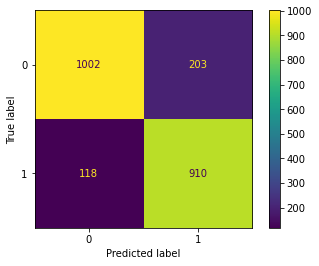

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=300)
rfc.fit(x_tr,y_tr)

y_pred = rfc.predict(x_te)

print(confusion_matrix(y_te,y_pred))
print('Accuracy : {:.2f}'.format(accuracy_score(y_te,y_pred)))
plot_confusion_matrix(rfc,x_te,y_te)

Accuracy : 0.77
[[984 221]
 [300 728]]


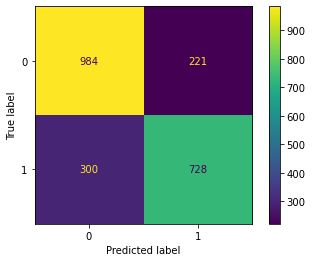

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_tr,y_tr)
y_pred=knn.predict(x_te)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,plot_confusion_matrix
plot_confusion_matrix(knn,x_te,y_te)
print('Accuracy : {:.2f}'.format(accuracy_score(y_te,y_pred)))
print(confusion_matrix(y_te,y_pred))

# Decision Tree

[[967 238]
 [274 754]]
Accuracy : 0.77


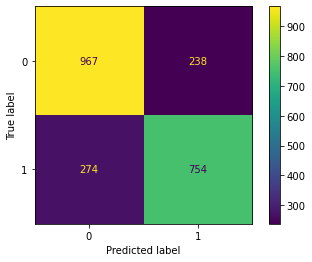

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_tr,y_tr)

y_pred = dtree.predict(x_te)

print(confusion_matrix(y_te,y_pred))
print('Accuracy : {:.2f}'.format(accuracy_score(y_te,y_pred)))
plot_confusion_matrix(dtree,x_te,y_te)

# ANN

In [17]:
x = df.drop(['housing','deposit','month','poutcome','marital','contact'],axis=1)
y = df['deposit']
x = pd.get_dummies(x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = pd.DataFrame(sc_x.fit_transform(x_train), columns=x.columns.values)
x_test = pd.DataFrame(sc_x.transform(x_test), columns=x.columns.values)

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential()
model.add(Dense(units = 13,kernel_initializer = 'uniform',activation = 'relu', input_dim = 25))
model.add(Dense(units = 29,kernel_initializer = 'uniform',activation = 'relu'))
model.add(Dense(units = 42,kernel_initializer = 'uniform',activation = 'relu'))

model.add(Dense(units = 1,kernel_initializer = 'uniform',activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size = 10, epochs = 150)

y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5) 


Epoch 1/150
893/893 [==============================] - 3s 2ms/step - loss: 0.5699 - accuracy: 0.6941
Epoch 2/150
893/893 [==============================] - 2s 2ms/step - loss: 0.4720 - accuracy: 0.7816
Epoch 3/150
893/893 [==============================] - 2s 2ms/step - loss: 0.4703 - accuracy: 0.7894
Epoch 4/150
893/893 [==============================] - 2s 2ms/step - loss: 0.4751 - accuracy: 0.7744
Epoch 5/150
893/893 [==============================] - 2s 2ms/step - loss: 0.4592 - accuracy: 0.7886
Epoch 6/150
893/893 [==============================] - 2s 2ms/step - loss: 0.4536 - accuracy: 0.7935
Epoch 7/150
893/893 [==============================] - 2s 2ms/step - loss: 0.4462 - accuracy: 0.8007
Epoch 8/150
893/893 [==============================] - 2s 2ms/step - loss: 0.4510 - accuracy: 0.7919
Epoch 9/150
893/893 [==============================] - 2s 2ms/step - loss: 0.4368 - accuracy: 0.8051
Epoch 10/150
893/893 [==============================] - 2s 2ms/step - loss: 0.4459 - accura

In [18]:
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[932 273]
 [231 797]]
0.774294670846395
